<a href="https://colab.research.google.com/github/ShreyaTripathi1/AlexNet-for-Object-Detection/blob/main/Implement_Alexnet_architecture_for_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alexnet architecture for object detection**

Name : **SHREYA TRIPATHI**

Reg No. : **22BAI10033**

---

# Explanation

The below code shows the training and evaluation of a convolutional neural network (CNN) using the **AlexNet** architecture to classify images from the **SVHN (Street View House Numbers)** dataset.

### The steps are explained below:-
1. **Imports and Setup:**
   - The code imports necessary libraries like `torch`, `torchvision`, `matplotlib`, and others required for data loading, transformation, training, and visualization.
   
2. **AlexNet Architecture:**
   - The AlexNet model is defined in the `AlexNet` class. The architecture includes:
     - **Convolutional Layers:** These layers capture features from the image (edges, textures, etc.).
     - **ReLU Activation:** Applied after each convolutional layer to introduce non-linearity.
     - **MaxPooling Layers:** Used to downsample the spatial dimensions of the feature maps.
     - **Fully Connected Layers:** These layers perform the final classification after flattening the feature maps.
   - The model is configured for **10 classes** (as the SVHN dataset consists of digits 0-9).

3. **Data Preprocessing and Loading:**
   - The `transform` function normalizes images to the range `[-1, 1]` using mean `(0.5, 0.5, 0.5)` and standard deviation `(0.5, 0.5, 0.5)` for each of the RGB channels.
   - The SVHN dataset is loaded for both **training** and **testing** using `torchvision.datasets.SVHN` and wrapped in `DataLoader` for batching and shuffling.

4. **Model, Loss Function, and Optimizer:**
   - The model is transferred to the available device (GPU or CPU).
   - **CrossEntropyLoss** is used as the loss function for multi-class classification.
   - **Adam Optimizer** is used to minimize the loss during training.

5. **Training Loop:**
   - The model is trained for **5 epochs**. In each epoch:
     - The model performs a forward pass through the data.
     - The loss is computed, and backpropagation is performed.
     - The optimizer updates the model's weights.
     - The average loss for the epoch is printed.

6. **Evaluation:**
   - After the training, the model is evaluated on the **test set**.
   - Accuracy is calculated by comparing the predicted labels to the true labels.
   - The predictions and true labels are stored for visualization.

7. **Visualization:**
   - A few images from the test set are displayed with both the **predicted** and **actual** labels.
   - The images are unnormalized and displayed using `matplotlib`.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define AlexNet architecture
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):  # SVHN has 10 classes (digits 0-9)
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),  # Changed input channels to 3 (RGB)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [ ]:
# Load SVHN dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize for 3 RGB channels
])

trainset = torchvision.datasets.SVHN(root='./data', split='train', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [ ]:
# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlexNet(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the model
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

Epoch 1, Loss: 0.3088
Epoch 2, Loss: 0.2812
Epoch 3, Loss: 0.2564
Epoch 4, Loss: 0.2368
Epoch 5, Loss: 0.2263


In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
print()
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 91.71%


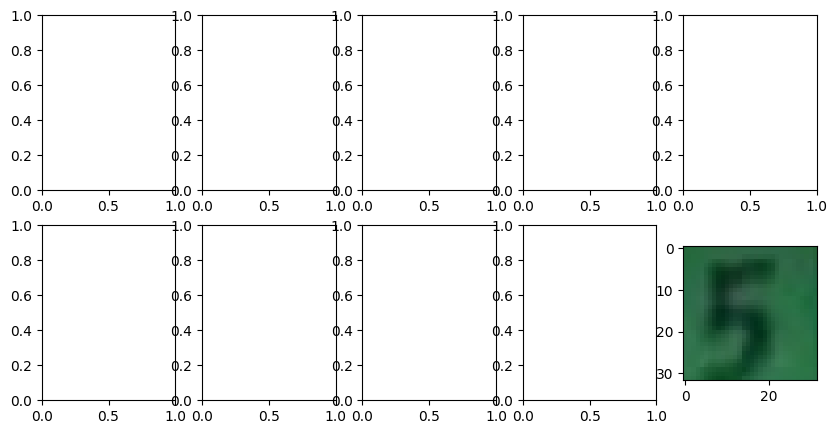

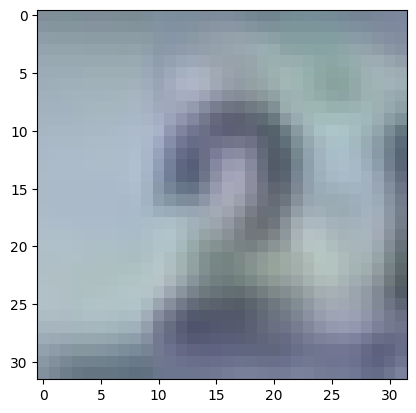

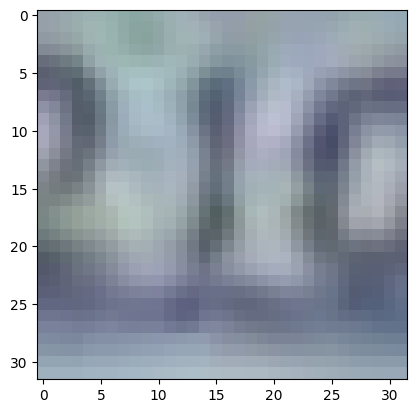

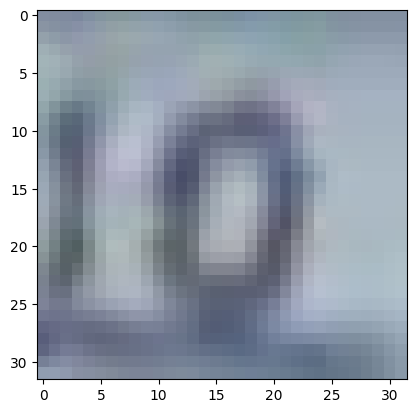

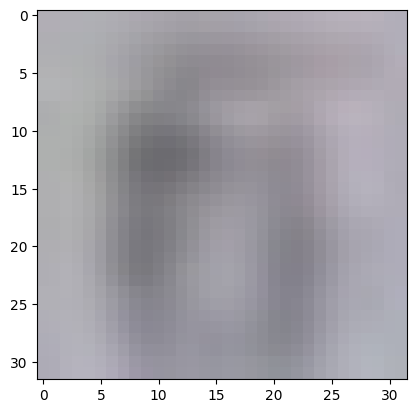

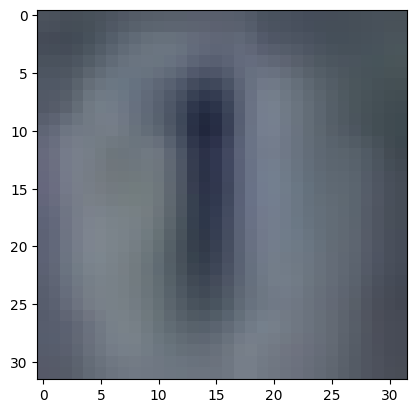

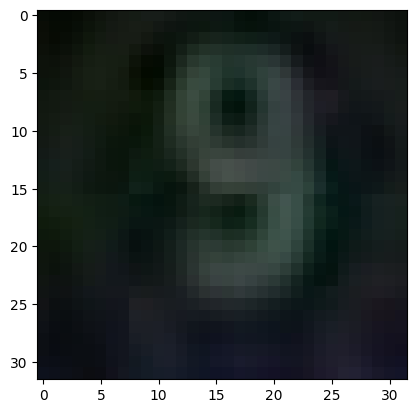

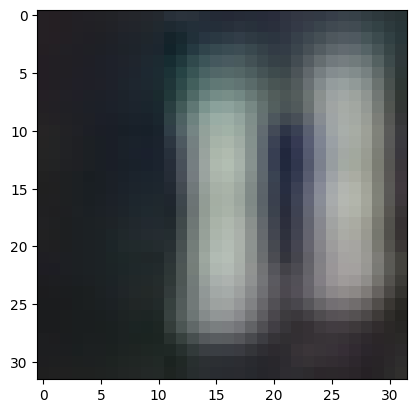

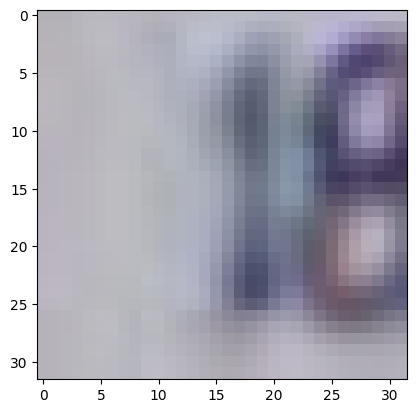

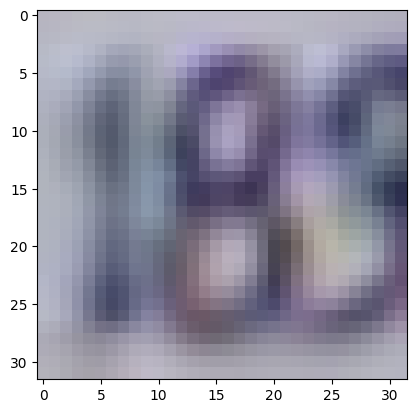

In [ ]:
# Visualization of some predictions
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
def imshow(img):
    img = img * 0.5 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images.to(device))
_, preds = torch.max(outputs, 1)

# Display images with predicted labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    imshow(images[i])
    ax.set_title(f"Pred: {classes[preds[i]]}\nActual: {classes[labels[i]]}")
    ax.axis("off")

plt.show()

---
# Demonstration on another dataset


The below code shows the use of **AlexNet** to classify images from the **Fashion-MNIST** dataset, which contains 10 categories of clothing items.

1. **Model:**
   - The architecture uses **convolutional layers** followed by **fully connected layers**.
   - It processes **grayscale images** (1 channel) instead of RGB.

2. **Data:**
   - **Fashion-MNIST** dataset is loaded with resized images (32x32) and normalized.
   - Both **training** and **test** datasets are prepared using `DataLoader`.

3. **Training:**
   - The model is trained for **5 epochs** using **Adam optimizer** and **CrossEntropyLoss**.
   - **Loss** is printed for each epoch.

4. **Evaluation:**
   - After training, the model is tested on the **test set** and accuracy is calculated.

5. **Visualization:**
   - A few **test images** are displayed with **predicted** vs **true labels**.


In [ ]:
# Define AlexNet architecture
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        print(x.shape)
        x = self.classifier(x)
        return x

In [ ]:
# Load Fashion-MNIST dataset
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [ ]:
# Train the model
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256,

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
print(f"Accuracy: {accuracy:.2f}%")


torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256, 4, 4])
torch.Size([64, 256,

In [ ]:
# Visualization of some predictions
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
def imshow(img):
    img = img * 0.5 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images.to(device))
_, preds = torch.max(outputs, 1)

torch.Size([64, 256, 4, 4])


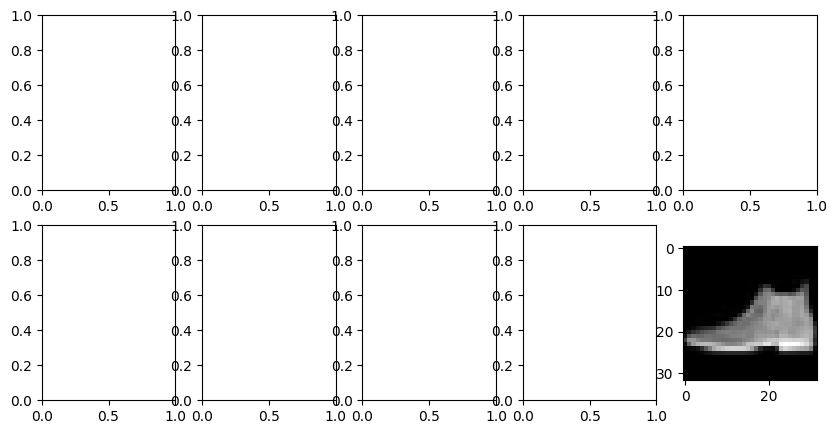

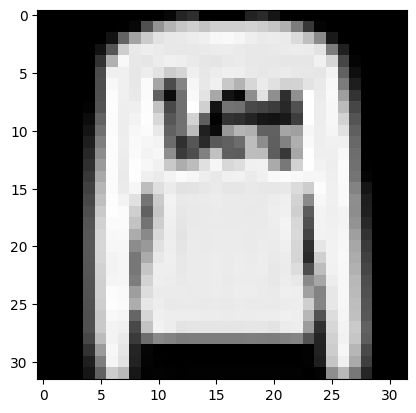

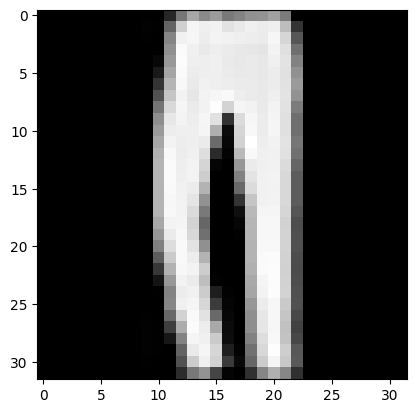

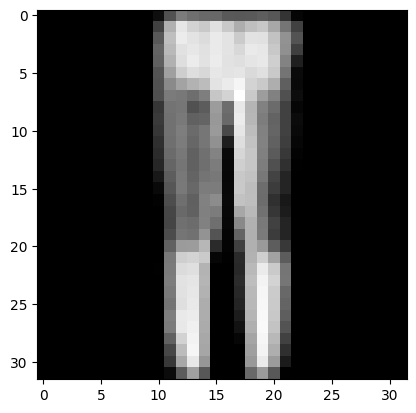

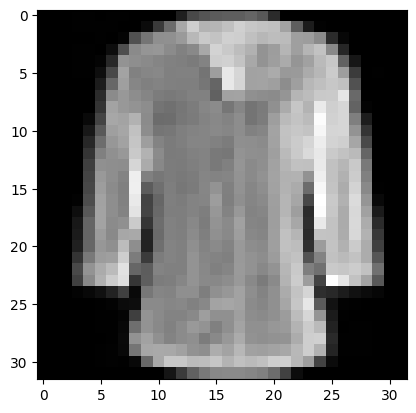

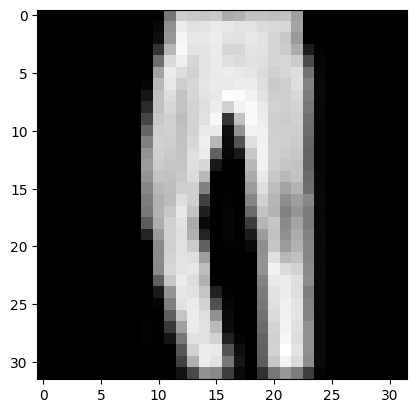

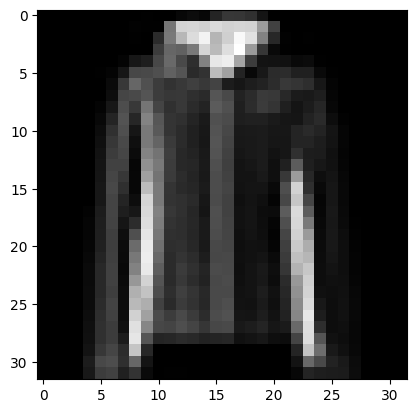

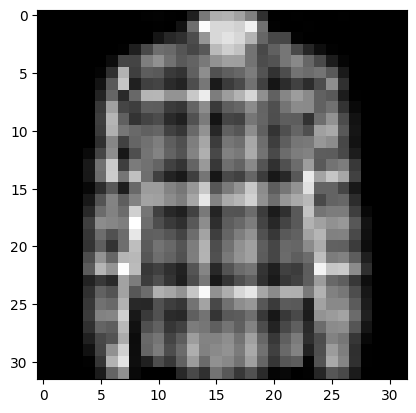

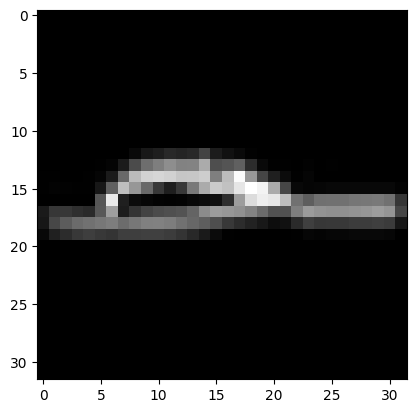

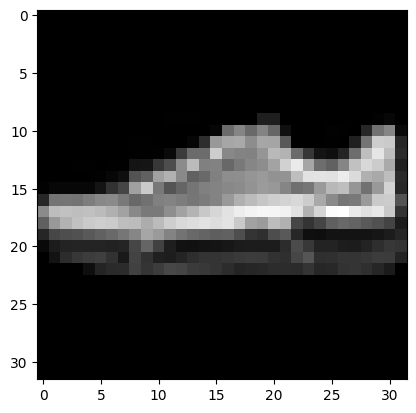

In [ ]:

# Display images with predicted labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    imshow(images[i])
    ax.set_title(f"Pred: {classes[preds[i]]}\nActual: {classes[labels[i]]}")
    ax.axis("off")

plt.show()